In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
df.describe()

stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000

In [5]:
df.head()


business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

In [6]:
df['text length'] = df.text.apply(len)

In [7]:
df.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  text length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0          889  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         1345  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0           76  
3  uZetl9T0NcROGOyFfughhg     1       2      0          419  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0          469

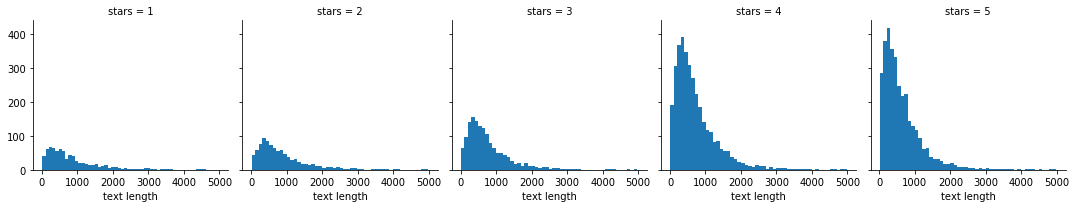

In [8]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length',bins = 50)

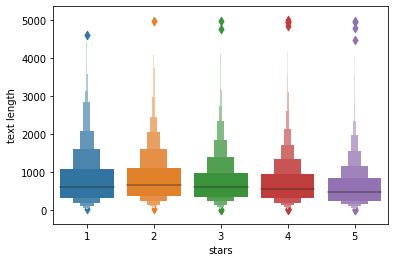

In [9]:
sns.boxenplot(x = 'stars',y='text length',data = df)

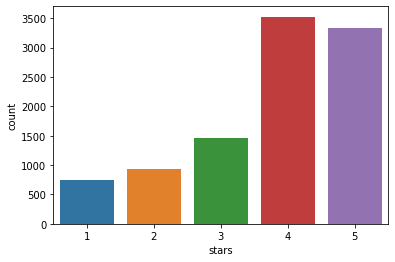

In [10]:
sns.countplot(x = 'stars',data=df)

In [11]:
stars  = df.groupby('stars').mean()

In [12]:
stars

cool    useful     funny  text length
stars                                           
1      0.576769  1.604806  1.056075   826.515354
2      0.719525  1.563107  0.875944   842.256742
3      0.788501  1.306639  0.694730   758.498289
4      0.954623  1.395916  0.670448   712.923142
5      0.944261  1.381780  0.608631   624.999101

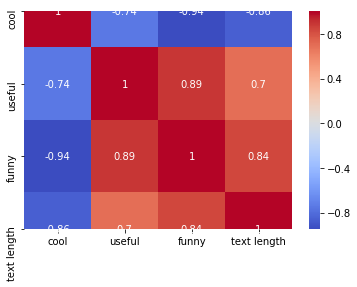

In [13]:
sns.heatmap(stars.corr(),annot=True,cmap='coolwarm')

In [14]:
import string

In [15]:
from nltk.corpus import stopwords

In [16]:
def text_process(mess):
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [c for c in nopunc.split() if c.lower not in stopwords.words('english')]

In [18]:
df['text'] = df['text'].apply(text_process)

In [19]:
df.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  [My, wife, took, me, here, on, my, birthday, f...  review   
1  [I, have, no, idea, why, some, people, give, b...  review   
2  [love, the, gyro, plate, Rice, is, so, good, a...  review   
3  [Rosie, Dakota, and, I, LOVE, Chaparral, Dog, ...  review   
4  [General, Manager, Scott, Petello, is, a, good...  review   

                  user_id  cool  useful  funny  text length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0          889  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         1345  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0           76  
3  uZetl9T0NcROGOyFfughhg     1       2      0          419  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0          469

In [20]:
X = df['text']
y = df['stars']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
from sklearn.pipeline import Pipeline

In [35]:
pipline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
     ('Tfid',TfidfTransformer()),
     ('Classifier',MultinomialNB())
])

In [36]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002116FB5A318>)),
                ('Tfid', TfidfTransformer()), ('Classifier', MultinomialNB())])

In [37]:
from sklearn.metrics import classification_report

In [38]:
prediction = pipline.predict(X_test)

In [39]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       243
           2       0.00      0.00      0.00       291
           3       0.00      0.00      0.00       482
           4       0.36      1.00      0.53      1179
           5       1.00      0.00      0.00      1105

    accuracy                           0.36      3300
   macro avg       0.27      0.20      0.11      3300
weighted avg       0.46      0.36      0.19      3300



C:\Users\dhana\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
